<a href="https://colab.research.google.com/github/hungrycarpet/Quakedet/blob/main/earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib import request
import numpy as np
import pandas as pd
import sklearn as sk
import os
import json
import csv
from sklearn.base import BaseEstimator,TransformerMixin

In [3]:
columns=['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi',
       'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'longitude', 'latitude', 'radius']



In [4]:
def get_the_data(path='/content/usgs_data_big_file2 (1).csv'):
  l=[]
  with open(path,encoding='CP949') as fileob:
      fileob.readline()
      for line in fileob:
          l.append(dict(list(zip(columns,line.split(',')))))
  return pd.DataFrame(l,columns=columns)


In [5]:
data_frame=pd.read_csv('/content/all_month.csv',encoding='utf-8',na_values='None')

In [6]:
data_frame.shape

(5488, 22)

In [7]:
data_frame.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-03-22T19:13:40.610Z,19.223333,-155.390671,29.59,2.10,md,34.0,166.0,NaN,0.12,hv,hv72395852,2021-03-22T19:16:42.630Z,"9 km ENE of Pāhala, Hawaii",earthquake,0.63,0.89,0.110,9.0,automatic,hv,hv
1,2021-03-22T19:10:16.504Z,61.797800,-151.618000,90.10,1.60,ml,NaN,NaN,NaN,0.41,ak,ak0213q9wixb,2021-03-22T19:14:44.891Z,"24 km SSW of Skwentna, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
2,2021-03-22T19:03:12.880Z,33.655667,-116.696167,11.26,0.94,ml,28.0,86.0,0.05735,0.34,ci,ci39587543,2021-03-22T19:06:55.230Z,"10km SSE of Idyllwild, CA",earthquake,0.53,0.97,0.108,26.0,automatic,ci,ci
3,2021-03-22T19:01:42.630Z,36.553833,-89.649498,9.28,2.35,md,11.0,77.0,0.10510,0.12,nm,nm60328502,2021-03-22T19:05:58.230Z,"4 km WSW of Howardville, Missouri",earthquake,0.71,1.13,0.190,9.0,reviewed,nm,nm
4,2021-03-22T18:45:29.770Z,38.835667,-122.810997,1.86,0.85,md,14.0,52.0,0.01228,0.02,nc,nc73540705,2021-03-22T18:54:06.939Z,"8km W of Cobb, CA",earthquake,0.26,0.70,NaN,1.0,automatic,nc,nc


In [8]:
def value_counts(frame):
  for column in frame.columns:
    print(frame[column].value_counts())
    print('\n------------------------------------\n')



In [9]:
data_frame.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1529
gap                 798
dmin               1600
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1412
depthError            1
magError           1106
magNst              860
status                1
locationSource        1
magSource             1
dtype: int64

In [ ]:
value_counts(data_frame)

In [10]:
def get_dtypes(frame):
  for column in frame.columns:
    print('{:10s}->'.format(column),frame[column].dtype)
get_dtypes(data_frame)

time      -> object
latitude  -> float64
longitude -> float64
depth     -> float64
mag       -> float64
magType   -> object
nst       -> float64
gap       -> float64
dmin      -> float64
rms       -> float64
net       -> object
id        -> object
updated   -> object
place     -> object
type      -> object
horizontalError-> float64
depthError-> float64
magError  -> float64
magNst    -> float64
status    -> object
locationSource-> object
magSource -> object


In [11]:
data1=data_frame.drop(columns=['updated','id','place','time'])

In [ ]:
get_dtypes(data1)

latitude  -> float64
longitude -> float64
depth     -> float64
mag       -> float64
magType   -> object
nst       -> float64
gap       -> float64
dmin      -> float64
rms       -> float64
net       -> object
type      -> object
horizontalError-> float64
depthError-> float64
magError  -> float64
magNst    -> float64
status    -> object
locationSource-> object
magSource -> object


In [ ]:
data1.head(5)

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,19.223333,-155.390671,29.59,2.10,md,34.0,166.0,NaN,0.12,hv,earthquake,0.63,0.89,0.110,9.0,automatic,hv,hv
1,61.797800,-151.618000,90.10,1.60,ml,NaN,NaN,NaN,0.41,ak,earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
2,33.655667,-116.696167,11.26,0.94,ml,28.0,86.0,0.05735,0.34,ci,earthquake,0.53,0.97,0.108,26.0,automatic,ci,ci
3,36.553833,-89.649498,9.28,2.35,md,11.0,77.0,0.10510,0.12,nm,earthquake,0.71,1.13,0.190,9.0,reviewed,nm,nm
4,38.835667,-122.810997,1.86,0.85,md,14.0,52.0,0.01228,0.02,nc,earthquake,0.26,0.70,NaN,1.0,automatic,nc,nc


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f855da1e990>,
      dtype=object)

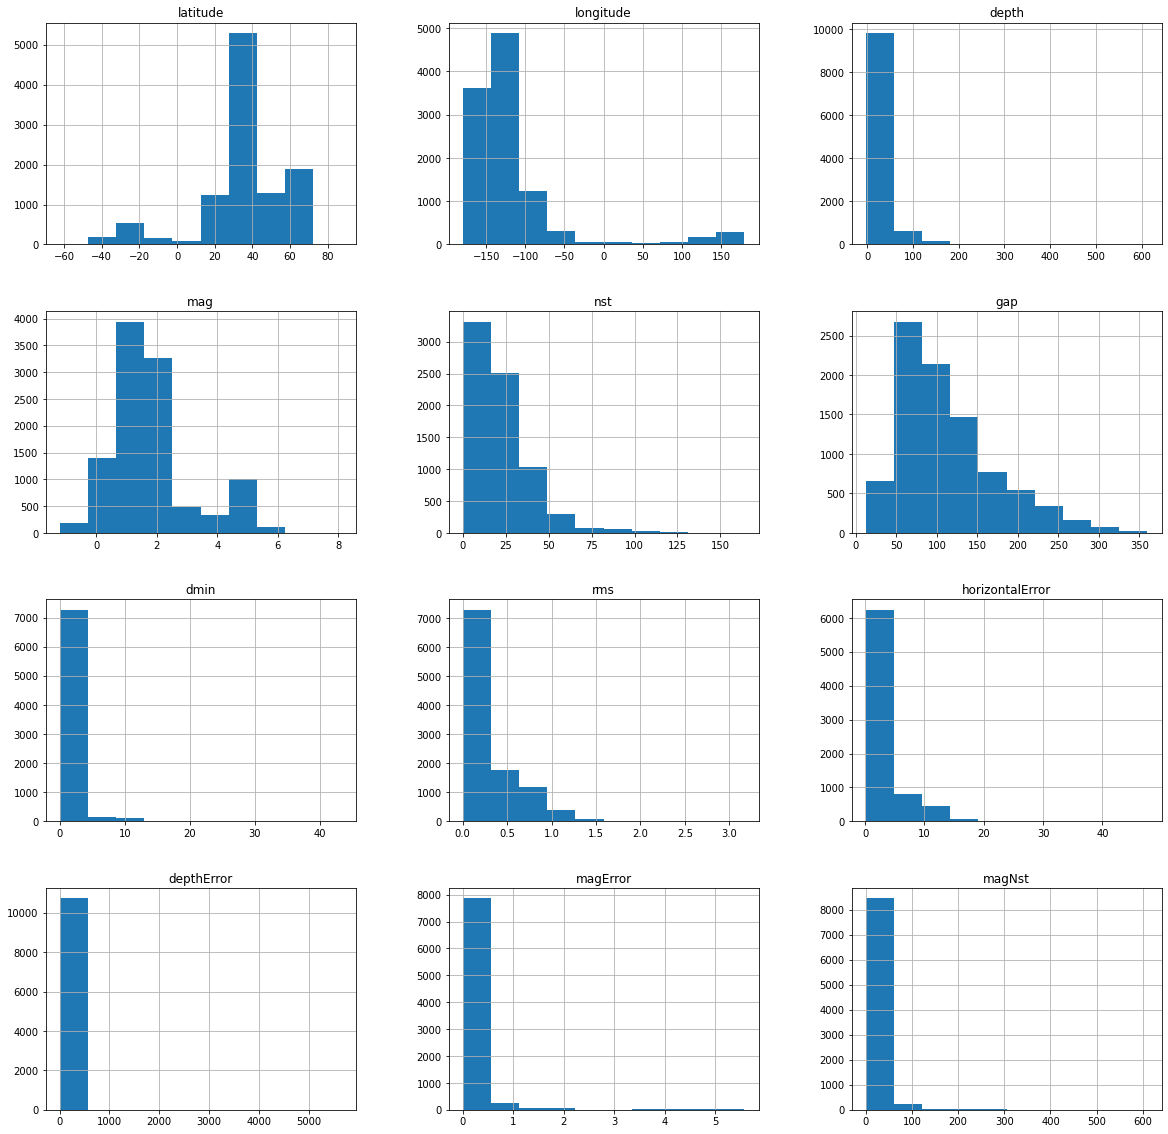

In [ ]:
data1.hist(figsize=(20,20))


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
from pandas import plotting 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data2=data1.loc[data1['mag'].notnull(),:].copy()

In [16]:
np.random.seed(44)
shuffle1=data2.iloc[np.random.permutation(data2.shape[0]),:]

In [17]:
shuffle1.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
890,43.081000,-70.271500,10.00,2.40,ml,NaN,202.0,0.99400,0.41,us,earthquake,2.70,2.00,0.066000,30.0,reviewed,us,us
5004,36.698833,-121.376667,0.82,0.79,md,12.0,70.0,0.08630,0.09,nc,earthquake,0.34,1.66,0.165000,8.0,reviewed,nc,nc
3584,35.621000,-117.425000,7.75,1.14,ml,19.0,100.0,0.04587,0.12,ci,earthquake,0.24,0.54,0.093000,12.0,reviewed,ci,ci
2435,19.522500,-155.660833,3.77,0.88,md,15.0,112.0,NaN,0.10,hv,earthquake,0.43,0.70,0.126847,7.0,reviewed,hv,hv
2329,-24.158100,-67.316700,198.38,4.40,mb,NaN,106.0,1.43700,0.75,us,earthquake,12.90,19.40,0.380000,2.0,reviewed,us,us


In [ ]:
shuffle1.isnull().sum()

latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3408
gap                1860
dmin               3146
rms                   0
net                   0
type                  0
horizontalError    3152
depthError            0
magError           2386
magNst             1928
status                0
locationSource        0
magSource             0
dtype: int64

In [18]:
train_data,test_data=train_test_split(shuffle1,test_size=0.12,random_state=43)
train_data,val_data=train_test_split(train_data,test_size=0.12,random_state=43)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f5f92ffd0>,
      dtype=object)

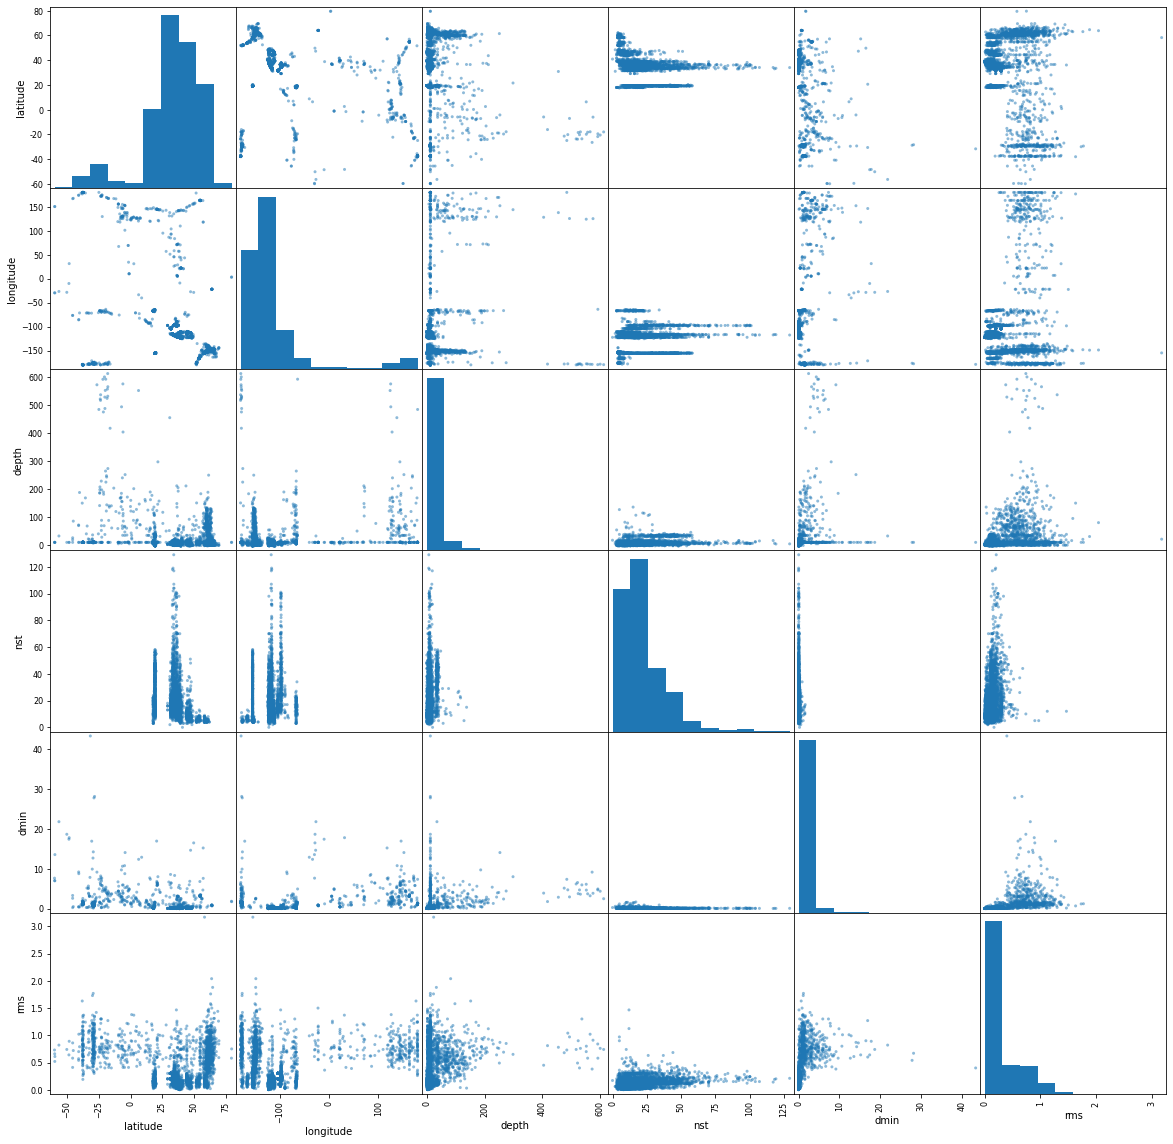

In [32]:
plotting.scatter_matrix(train_data[['latitude','longitude','depth','nst','dmin','rms']],
                        figsize=(20,20))

<function matplotlib.pyplot.show>

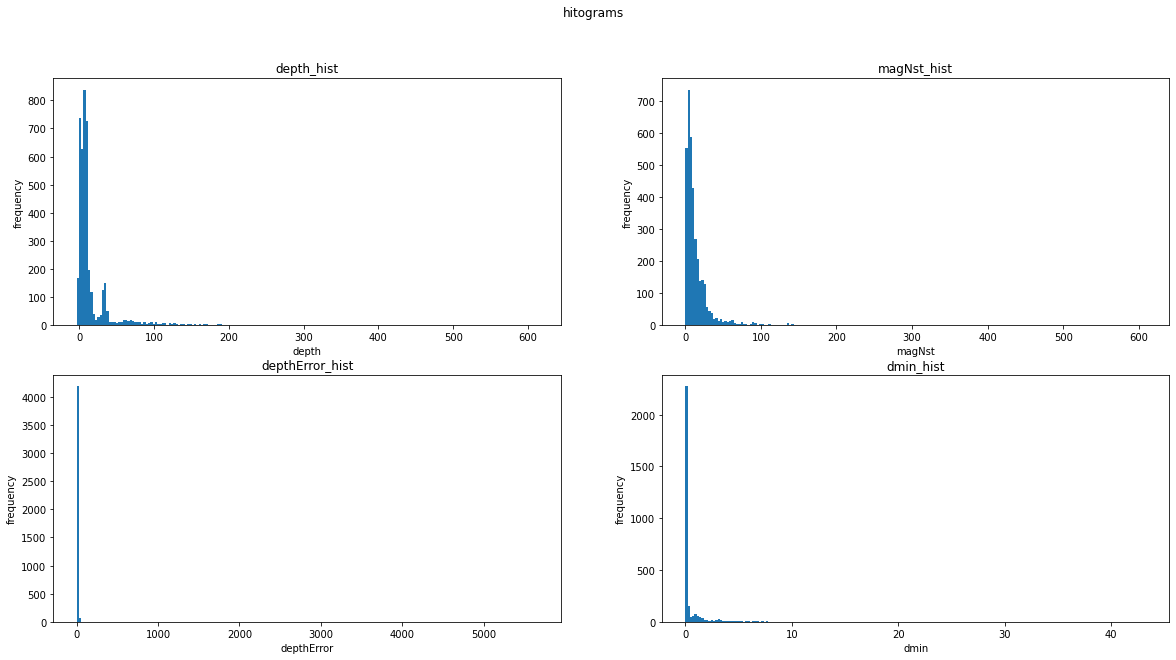

In [33]:
fig=plt.figure(figsize=(20,10))
hist_columns=['depth','magNst','depthError','dmin']
ranges=[()]
for i in range(4):
  ax=fig.add_subplot(2,2,i+1)
  ax.hist(train_data[hist_columns[i]],bins=200)
  ax.set_xlabel(hist_columns[i])
  ax.set_ylabel('frequency')
  ax.set_title(hist_columns[i]+'_'+'hist')

fig.suptitle('hitograms')
plt.show


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


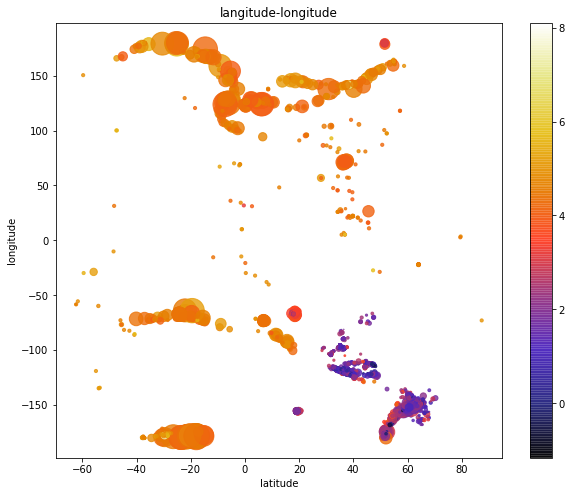

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
t=ax.scatter(x=num_train_data['latitude'],
             y=num_train_data['longitude'],
             s=num_train_data['depth'],
             c=num_train_data['mag'],
             cmap='CMRmap',alpha=0.8)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_title('langitude-longitude')
fig.colorbar(t)

In [19]:
trainY_mag,trainY_latitude,trainY_longitude=train_data['mag'].copy(),train_data['latitude'].copy(),train_data['longitude'].copy()

testY_mag,testY_latitude,testY_longitude=test_data['mag'].copy(),test_data['latitude'].copy(),test_data['longitude'].copy()

valY_mag,valY_latitude,valY_longitude=val_data['mag'].copy(),val_data['latitude'].copy(),val_data['longitude'].copy()

trainX_mag,trainX_latitude,trainX_longitude=train_data.drop(columns=['mag']).copy(),train_data.drop(columns=['latitude']).copy(),train_data.drop(columns=['longitude']).copy()

testX_mag,testX_latitude,testX_longitude=test_data.drop(columns=['mag']).copy(),test_data.drop(columns=['latitude']).copy(),test_data.drop(columns=['longitude']).copy()

valX_mag,valX_latitude,valX_longitude=val_data.drop(columns=['mag']).copy(),val_data.drop(columns=['latitude']).copy(),val_data.drop(columns=['longitude']).copy()

In [20]:
train_data.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
5306,44.627000,-110.347333,5.38,1.07,md,11.0,74.0,0.07719,0.13,uu,earthquake,0.31,1.44,0.359000,9.0,reviewed,uu,uu
5084,58.244167,-155.149000,2.13,0.08,ml,5.0,109.0,NaN,0.04,av,earthquake,0.21,1.40,0.266331,3.0,reviewed,av,av
444,61.705800,-149.812900,33.80,1.80,ml,NaN,NaN,NaN,0.78,ak,earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3857,36.160167,-118.175500,6.00,1.51,ml,24.0,67.0,0.18430,0.12,ci,earthquake,0.17,0.94,0.132000,18.0,reviewed,ci,ci
1394,51.640000,178.591700,88.83,4.30,mb,NaN,201.0,2.65300,0.87,us,earthquake,12.20,11.20,0.046000,137.0,reviewed,us,us


In [21]:
trainX_mag.shape,trainX_latitude.shape,trainX_longitude.shape,trainY_mag.shape,trainY_longitude.shape,trainY_latitude.shape

((4249, 17), (4249, 17), (4249, 17), (4249,), (4249,), (4249,))

In [22]:
valX_mag.shape,valX_latitude.shape,valX_longitude.shape,valY_mag.shape,valY_longitude.shape,valY_latitude.shape

((580, 17), (580, 17), (580, 17), (580,), (580,), (580,))

In [23]:
non_numeric_columns=['magType','net','type','status','locationSource','magSource',]

numeric_columns_mag=list(set(trainX_mag.columns)-set(non_numeric_columns))

numeric_columns_longitude=list(set(trainX_longitude.columns)-set(non_numeric_columns))

numeric_columns_latitude=list(set(trainX_latitude.columns)-set(non_numeric_columns))

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
pipeline_mag=Pipeline([
                    ('impute',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])
pipeline_latitude=Pipeline([
                    ('impute',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])
pipeline_longitude=Pipeline([
                    ('impute',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])

arr=pipeline_mag.fit_transform(trainX_mag.loc[:,numeric_columns_mag].copy())

train_numeric_mag=pd.DataFrame(arr,columns=numeric_columns_mag)

arr=pipeline_latitude.fit_transform(trainX_latitude.loc[:,numeric_columns_latitude].copy())

train_numeric_latitude=pd.DataFrame(arr,columns=numeric_columns_latitude)

arr=pipeline_longitude.fit_transform(trainX_longitude.loc[:,numeric_columns_longitude].copy())

train_numeric_longitude=pd.DataFrame(arr,columns=numeric_columns_longitude)


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
train_numeric_mag.corr()

,latitude,magError,depth,magNst,rms,nst,longitude,horizontalError,gap,depthError,dmin
latitude,1.000000,-0.082561,-0.153744,-0.180182,-0.170548,-0.109283,-0.247044,-0.648528,-0.120807,0.016185,-0.374783
magError,-0.082561,1.000000,0.007857,-0.086077,-0.120608,0.183309,-0.131131,-0.096198,0.103514,-0.005647,-0.067893
depth,-0.153744,0.007857,1.000000,0.201235,0.273255,0.000990,0.121266,0.358581,-0.005267,0.007109,0.231868
magNst,-0.180182,-0.086077,0.201235,1.000000,0.262245,0.171112,0.254869,0.343112,-0.134326,-0.000379,0.246710
rms,-0.170548,-0.120608,0.273255,0.262245,1.000000,-0.055133,0.242583,0.563573,-0.031342,-0.006019,0.330948
nst,-0.109283,0.183309,0.000990,0.171112,-0.055133,1.000000,-0.022138,-0.108317,-0.317053,-0.009858,-0.048357
longitude,-0.247044,-0.131131,0.121266,0.254869,0.242583,-0.022138,1.000000,0.478350,-0.030998,-0.000962,0.391031
horizontalError,-0.648528,-0.096198,0.358581,0.343112,0.563573,-0.108317,0.478350,1.000000,0.166973,0.004405,0.641738
gap,-0.120807,0.103514,-0.005267,-0.134326,-0.031342,-0.317053,-0.030998,0.166973,1.000000,0.003931,0.037188
depthError,0.016185,-0.005647,0.007109,-0.000379,-0.006019,-0.009858,-0.000962,0.004405,0.003931,1.000000,0.001745


In [28]:
train_numeric_longitude.corr()

,latitude,magError,depth,magNst,mag,rms,nst,horizontalError,gap,depthError,dmin
latitude,1.000000,-0.082561,-0.153744,-0.180182,-0.614697,-0.170548,-0.109283,-0.648528,-0.120807,0.016185,-0.374783
magError,-0.082561,1.000000,0.007857,-0.086077,-0.007986,-0.120608,0.183309,-0.096198,0.103514,-0.005647,-0.067893
depth,-0.153744,0.007857,1.000000,0.201235,0.307147,0.273255,0.000990,0.358581,-0.005267,0.007109,0.231868
magNst,-0.180182,-0.086077,0.201235,1.000000,0.429574,0.262245,0.171112,0.343112,-0.134326,-0.000379,0.246710
mag,-0.614697,-0.007986,0.307147,0.429574,1.000000,0.642215,0.145627,0.780509,0.002058,-0.015078,0.498368
rms,-0.170548,-0.120608,0.273255,0.262245,0.642215,1.000000,-0.055133,0.563573,-0.031342,-0.006019,0.330948
nst,-0.109283,0.183309,0.000990,0.171112,0.145627,-0.055133,1.000000,-0.108317,-0.317053,-0.009858,-0.048357
horizontalError,-0.648528,-0.096198,0.358581,0.343112,0.780509,0.563573,-0.108317,1.000000,0.166973,0.004405,0.641738
gap,-0.120807,0.103514,-0.005267,-0.134326,0.002058,-0.031342,-0.317053,0.166973,1.000000,0.003931,0.037188
depthError,0.016185,-0.005647,0.007109,-0.000379,-0.015078,-0.006019,-0.009858,0.004405,0.003931,1.000000,0.001745


In [29]:
train_numeric_latitude.corr()

,magError,depth,magNst,mag,rms,nst,longitude,horizontalError,gap,depthError,dmin
magError,1.000000,0.007857,-0.086077,-0.007986,-0.120608,0.183309,-0.131131,-0.096198,0.103514,-0.005647,-0.067893
depth,0.007857,1.000000,0.201235,0.307147,0.273255,0.000990,0.121266,0.358581,-0.005267,0.007109,0.231868
magNst,-0.086077,0.201235,1.000000,0.429574,0.262245,0.171112,0.254869,0.343112,-0.134326,-0.000379,0.246710
mag,-0.007986,0.307147,0.429574,1.000000,0.642215,0.145627,0.469424,0.780509,0.002058,-0.015078,0.498368
rms,-0.120608,0.273255,0.262245,0.642215,1.000000,-0.055133,0.242583,0.563573,-0.031342,-0.006019,0.330948
nst,0.183309,0.000990,0.171112,0.145627,-0.055133,1.000000,-0.022138,-0.108317,-0.317053,-0.009858,-0.048357
longitude,-0.131131,0.121266,0.254869,0.469424,0.242583,-0.022138,1.000000,0.478350,-0.030998,-0.000962,0.391031
horizontalError,-0.096198,0.358581,0.343112,0.780509,0.563573,-0.108317,0.478350,1.000000,0.166973,0.004405,0.641738
gap,0.103514,-0.005267,-0.134326,0.002058,-0.031342,-0.317053,-0.030998,0.166973,1.000000,0.003931,0.037188
depthError,-0.005647,0.007109,-0.000379,-0.015078,-0.006019,-0.009858,-0.000962,0.004405,0.003931,1.000000,0.001745


In [ ]:
pipeline_mag=Pipeline([
                    ('impute',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])
pipeline_latitude=Pipeline([
                    ('impute',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])
pipeline_longitude=Pipeline([
                    ('impute',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])


column_mag=ColumnTransformer([
                              ('pipeline',pipeline_mag,numeric_columns_mag),
                              ('encode',OneHotEncoder(),non_numeric_columns)
])

column_latitude=ColumnTransformer([
                              ('pipeline',pipeline_latitude,numeric_columns_latitude),
                              ('encode',OneHotEncoder(),non_numeric_columns)
])
column_longitude=ColumnTransformer([
                              ('pipeline',pipeline_longitude,numeric_columns_longitude),
                              ('encode',OneHotEncoder(),non_numeric_columns)
])

